# <center> Аналіз матчів Чемпіонату світу з футболу 2022 року та його основих тенденцій </center>

## 1. Первинний аналіз та підготовка даних. 

**Мета аналітичного звіту** - виявити основні тенденції успішності команд на цьому турнірі, а саме за яких ключових показників досягається результат на найвищому рівні в стислих часових рамках підготовки.

Для початку імпортуємо всі необхідні бібліотеки для аналізу:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [10, 6]

Ми аналізуємо БД командних показників чемпіонату світу з футболу 2022 року. Для початку завантажимо файл csv в датафрейм.

In [4]:
df = pd.read_csv("Fifa_world_cup_matches.csv")

Перевіримо, чи все правильно завантажилось і виведемо перших 5 записів датафрейму:

In [5]:
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


Виведемо загальну інформацію по датафрейму:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

Можемо запросити описові статистики по стовпцям датафрейму:

In [7]:
df.describe()

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


У разі кількісних показників цей метод повертає таблицю з основними описовими статистиками:

count - Число непустих (заповнених) значень;

mean - середнє арифметичне;

std – стандартне відхилення (показник розкиду даних щодо середнього значення);

min – мінімальне значення;

max – максимальне значення;

25% – нижній квартиль (значення, яке 25% значень не перевищує);

50% - медіана (значення, яке 50% значень не перевищують);

75% - верхній квартиль (значення, яке 75% значень не перевищує).

Наш датафрейм має статистичні дані про футбольні матчі на чемпіонаті світу 2022 року з різноманітними показниками.
Пропоную деталізувати наш датасет на ключових показниках. Список показників ми дізналися за допомогою методу describe().

In [8]:
df[['team1', 'team2','passes completed team1','passes completed team2','on target attempts team1',
    'on target attempts team2', 'number of goals team1','number of goals team2']]

,team1,team2,passes completed team1,passes completed team2,on target attempts team1,on target attempts team2,number of goals team1,number of goals team2
0,QATAR,ECUADOR,381,409,0,3,0,2
1,ENGLAND,IRAN,730,154,7,3,6,2
2,SENEGAL,NETHERLANDS,313,374,3,3,0,2
3,UNITED STATES,WALES,509,321,1,3,1,1
4,ARGENTINA,SAUDI ARABIA,529,190,6,2,1,2
...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,453,310,6,5,1,2
60,ARGENTINA,CROATIA,344,551,7,3,3,0
61,FRANCE,MOROCCO,307,518,2,1,2,0
62,CROATIA,MOROCCO,430,428,4,2,2,1


Давайте проаналізуємо середнє значення **точних передач кожної з команд чемпіонату світу**:

In [9]:
part1 = df.groupby('team1')['passes completed team1'].mean()
part2 = df.groupby('team2')['passes completed team2'].mean()

In [10]:
total_pas = part1+part2

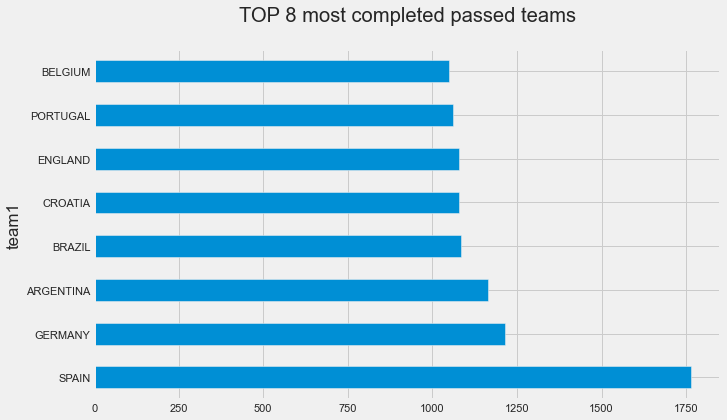

In [11]:
top_8_team_pass = total_pas.sort_values(ascending=False).head(8)
top_8_team_pass.plot(kind = 'barh', title = 'TOP 8 most completed passed teams\n')
plt.show()

Звичайно, варто проаналізувати **найбільш результативні команди турніру**:

In [12]:
goal_part1 = df.groupby('team1')['number of goals team1'].sum()
goal_part2 = df.groupby('team2')['number of goals team2'].sum()

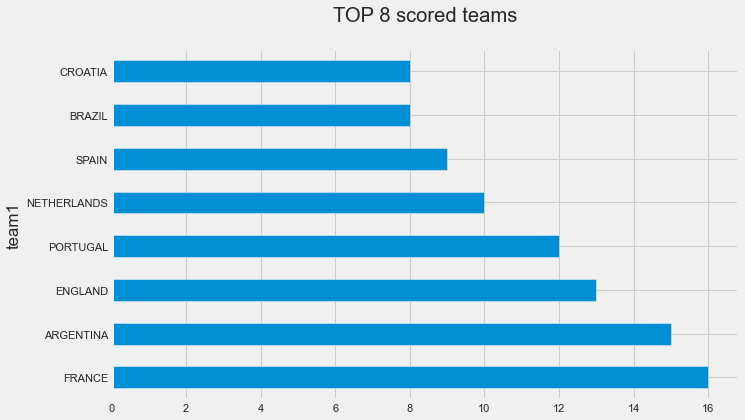

In [13]:
total_goal = goal_part1+goal_part2
top_8_team_goal = total_goal.sort_values(ascending=False).head(8)
top_8_team_goal.plot(kind = 'barh', title = 'TOP 8 scored teams\n')
plt.show()

Також звернемо увагу на команди, які **найбільше влучали в ствір воріт**:

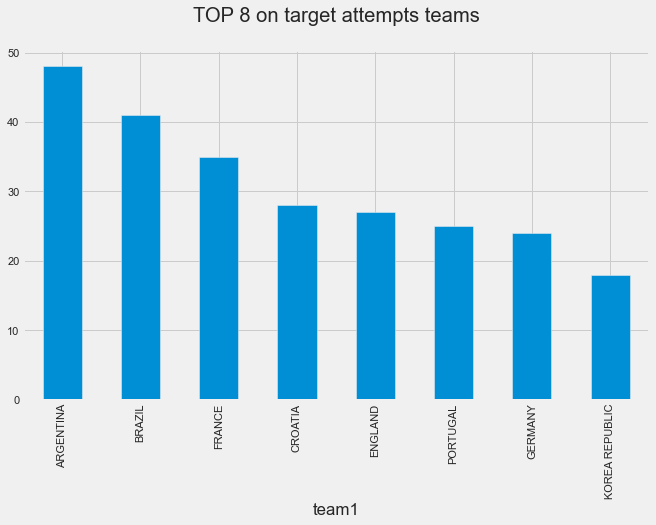

In [14]:
attem_on_part1 = df.groupby('team1')['on target attempts team1'].sum()
attem_on_part2 = df.groupby('team2')['on target attempts team2'].sum()
total_attem_on = attem_on_part1+attem_on_part2
top_8_attem_on = total_attem_on.sort_values(ascending=False).head(8)
top_8_attem_on.plot(kind = 'bar', title = 'TOP 8 on target attempts teams\n')
plt.show()

Тепер давайте визначимо, які команди досягли найбільшого успіху в цьому турнірі за допомогою функції:

In [15]:
def category(set_cat):
  return df[df.category == set_cat]

In [16]:
category("Semi-final") #можна обрати категорію та подивитися результати, які цікавлять

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,...,0,0,13,14,0,0,72,47,328,218


**В полуфінал вийшли 4 команди: Аргентина, Хорватія, Франція та Марокко.** Що ми бачимо?

Аргентина (переможець турніру) входить до топ-3 команд по точним передачам, топ-2 найрезультативніших команд і займає 1-у позицію по ударам в ствір воріт. У Хорватії не вражаючі показники (ТОП 5 по точним передачам, ТОП-8 по голам та ТОП-4 по ударам в ствір). Водночас з тим, Франція - найрезультативніша команда турніру та входить в ТОП-3 по ударам в ствір воріт.

Очевидно, що Марокко - це команда-відкриття турніру. Зверніть увагу, що ця команда не увійшла в ТОП-8 по нашим обраним базовим параметрам! Як вони досягли такого результату? Завдяки чому?

Останнім часом спостерігається великий попит на атакувальний футбол, точні передачі в матчі, володіння м'ячем, але, як бачимо - це не основні чинники результату команди. Навіть такі футбольні гіганти, як Іспанія та Німеччина надзвичайно якісно працюють з м'ячем, але наскільки це впливає на ефективність? Давайте розбиратись!

## 2. Завдання дослідження:

    - дослідити предметну область дослідження та виявити більш глибокі показники для аналізу в датафреймі;
    - згрупувати показники в окремий датафрейм та проаналізувати, як ці показники впливають на результат команд на турнірі;
    - навести приклад залежності показників у дослідженні;
    - сформувати основні тенденції успішності команд на турнірі.

Дані володіння м'ячем у команд відображено у відсотках, це не зовсім зручно для подальших розрахунків. Змінимо тип даних в числовий формат:

In [17]:
df['possession team1'] = df['possession team1'].apply(lambda x: x.replace("%",''))
df['possession team2'] = df['possession team2'].apply(lambda x: x.replace("%",''))

In [18]:
df['possession team1'] = pd.to_numeric(df['possession team1'])
df['possession team2'] = pd.to_numeric(df['possession team2'])

Перш ніж проводити детальний аналіз по більш глибоким показникам, 
додам новий показник - **ефективність розриву ліній структури суперника**.

In [19]:
df['efficiency_line_breaks_team1'] = df['completed line breaksteam1'] / df['attempted line breaks team1'] * 100 
df['efficiency_line_breaks_team2'] = df['completed line breaks team2'] / df['attempted line breaks team2'] * 100 

Обрані показники згрупуємо по командах, які грали вдома та виїзді. Нижче будемо аналізувати їх окремо.

In [20]:
## перша дослідна таблиця
first_table = df.groupby('team1') \
    .agg({'possession team1': 'mean',
          'inbetween offers to receive team1': 'sum',
          'infront offers to receive team1': 'sum',
          'receptions between midfield and defensive lines team1': 'sum',
          'defensive pressures applied team1': 'sum',
          'completed line breaksteam1' : 'sum',
          'efficiency_line_breaks_team1' : 'mean',
          'attempted defensive line breaks team1' : 'sum',
          'switches of play completed team1': 'sum',
          'crosses team1' : 'sum'}) \
    .reset_index()
first_table.head()

,team1,possession team1,inbetween offers to receive team1,infront offers to receive team1,receptions between midfield and defensive lines team1,defensive pressures applied team1,completed line breaksteam1,efficiency_line_breaks_team1,attempted defensive line breaks team1,switches of play completed team1,crosses team1
0,ARGENTINA,49.400000,1137,1281,86,1224,604,67.472443,120,23,77
1,AUSTRALIA,24.000000,114,100,8,341,81,48.795181,17,1,11
2,BELGIUM,51.000000,479,612,12,478,222,68.613615,26,10,27
3,BRAZIL,50.333333,750,855,44,828,393,72.489272,57,21,63
4,CAMEROON,34.500000,293,332,24,606,170,54.487797,38,9,32


In [21]:
# друга дослідна таблиця
second_table = df.groupby('team2') \
    .agg({'possession team2': 'mean',
          'inbetween offers to receive team2': 'sum',
          'infront offers to receive team2': 'sum',
          'receptions between midfield and defensive lines team2': 'sum',
          'defensive pressures applied team2': 'sum',
          'completed line breaks team2' : 'sum',
          'efficiency_line_breaks_team2' : 'mean',
          'attempted defensive line breaks team2' : 'sum',
          'switches of play completed team2': 'sum',
          'crosses team2' : 'sum'}) \
    .reset_index()
second_table.head()

,team2,possession team2,inbetween offers to receive team2,infront offers to receive team2,receptions between midfield and defensive lines team2,defensive pressures applied team2,completed line breaks team2,efficiency_line_breaks_team2,attempted defensive line breaks team2,switches of play completed team2,crosses team2
0,ARGENTINA,55.500000,560,719,28,464,310,73.974495,49,15,38
1,AUSTRALIA,33.666667,512,581,23,1042,267,59.795989,46,15,47
2,BELGIUM,47.000000,181,277,12,346,115,64.971751,26,4,24
3,BRAZIL,50.500000,567,515,20,649,266,72.757951,34,7,53
4,CAMEROON,46.000000,248,204,5,316,103,56.593407,16,8,20


In [22]:
#фінальна таблиця
final_table = first_table.merge(second_table, left_on='team1', right_on='team2')
final_table.head()

,team1,possession team1,inbetween offers to receive team1,infront offers to receive team1,receptions between midfield and defensive lines team1,defensive pressures applied team1,completed line breaksteam1,efficiency_line_breaks_team1,attempted defensive line breaks team1,switches of play completed team1,...,possession team2,inbetween offers to receive team2,infront offers to receive team2,receptions between midfield and defensive lines team2,defensive pressures applied team2,completed line breaks team2,efficiency_line_breaks_team2,attempted defensive line breaks team2,switches of play completed team2,crosses team2
0,ARGENTINA,49.400000,1137,1281,86,1224,604,67.472443,120,23,...,55.500000,560,719,28,464,310,73.974495,49,15,38
1,AUSTRALIA,24.000000,114,100,8,341,81,48.795181,17,1,...,33.666667,512,581,23,1042,267,59.795989,46,15,47
2,BELGIUM,51.000000,479,612,12,478,222,68.613615,26,10,...,47.000000,181,277,12,346,115,64.971751,26,4,24
3,BRAZIL,50.333333,750,855,44,828,393,72.489272,57,21,...,50.500000,567,515,20,649,266,72.757951,34,7,53
4,CAMEROON,34.500000,293,332,24,606,170,54.487797,38,9,...,46.000000,248,204,5,316,103,56.593407,16,8,20


In [23]:
final_table = final_table.drop('team2', axis=1)
final_table.columns = final_table.columns.str.replace(" ", "_")
final_table.columns

Index(['team1', 'possession_team1', 'inbetween_offers_to_receive_team1',
       'infront_offers_to_receive_team1',
       'receptions_between_midfield_and_defensive_lines_team1',
       'defensive_pressures_applied_team1', 'completed_line_breaksteam1',
       'efficiency_line_breaks_team1', 'attempted_defensive_line_breaks_team1',
       'switches_of_play_completed_team1', 'crosses_team1', 'possession_team2',
       'inbetween_offers_to_receive_team2', 'infront_offers_to_receive_team2',
       'receptions_between_midfield_and_defensive_lines_team2',
       'defensive_pressures_applied_team2', 'completed_line_breaks_team2',
       'efficiency_line_breaks_team2', 'attempted_defensive_line_breaks_team2',
       'switches_of_play_completed_team2', 'crosses_team2'],
      dtype='object')

Згрупуємо обрані показники та створимо один окремий датафрейм:

In [24]:
final_table = final_table.rename(columns={'team1' : 'team'})

final_table = final_table.assign(total_possession = (final_table.possession_team1 + final_table.possession_team2) / 2)
final_table = final_table.assign(total_inbetween_offers = final_table.inbetween_offers_to_receive_team1 + final_table.inbetween_offers_to_receive_team2)
final_table = final_table.assign(total_infront_offers = final_table.infront_offers_to_receive_team1 + final_table.infront_offers_to_receive_team2)
final_table = final_table.assign(total_receptions = final_table.receptions_between_midfield_and_defensive_lines_team1 + final_table.receptions_between_midfield_and_defensive_lines_team2)
final_table = final_table.assign(total_defensive_pressures = final_table.defensive_pressures_applied_team1 + final_table.defensive_pressures_applied_team2)
final_table = final_table.assign(total_completed_line_break = final_table.completed_line_breaksteam1 + final_table.completed_line_breaks_team2)
final_table = final_table.assign(total_efficiency_line_breaks = (final_table.efficiency_line_breaks_team1 + final_table.efficiency_line_breaks_team2) / 2)
final_table = final_table.assign(total_attempted_defensive_line = final_table.attempted_defensive_line_breaks_team1 + final_table.attempted_defensive_line_breaks_team2)
final_table = final_table.assign(total_switches_of_play = final_table.switches_of_play_completed_team1 + final_table.switches_of_play_completed_team2)
final_table = final_table.assign(total_crosses_team = final_table.crosses_team1 + final_table.crosses_team2)

final_table.head()

,team,possession_team1,inbetween_offers_to_receive_team1,infront_offers_to_receive_team1,receptions_between_midfield_and_defensive_lines_team1,defensive_pressures_applied_team1,completed_line_breaksteam1,efficiency_line_breaks_team1,attempted_defensive_line_breaks_team1,switches_of_play_completed_team1,...,total_possession,total_inbetween_offers,total_infront_offers,total_receptions,total_defensive_pressures,total_completed_line_break,total_efficiency_line_breaks,total_attempted_defensive_line,total_switches_of_play,total_crosses_team
0,ARGENTINA,49.400000,1137,1281,86,1224,604,67.472443,120,23,...,52.450000,1697,2000,114,1688,914,70.723469,169,38,115
1,AUSTRALIA,24.000000,114,100,8,341,81,48.795181,17,1,...,28.833333,626,681,31,1383,348,54.295585,63,16,58
2,BELGIUM,51.000000,479,612,12,478,222,68.613615,26,10,...,49.000000,660,889,24,824,337,66.792683,52,14,51
3,BRAZIL,50.333333,750,855,44,828,393,72.489272,57,21,...,50.416667,1317,1370,64,1477,659,72.623612,91,28,116
4,CAMEROON,34.500000,293,332,24,606,170,54.487797,38,9,...,40.250000,541,536,29,922,273,55.540602,54,17,52


In [25]:
final_table.columns

Index(['team', 'possession_team1', 'inbetween_offers_to_receive_team1',
       'infront_offers_to_receive_team1',
       'receptions_between_midfield_and_defensive_lines_team1',
       'defensive_pressures_applied_team1', 'completed_line_breaksteam1',
       'efficiency_line_breaks_team1', 'attempted_defensive_line_breaks_team1',
       'switches_of_play_completed_team1', 'crosses_team1', 'possession_team2',
       'inbetween_offers_to_receive_team2', 'infront_offers_to_receive_team2',
       'receptions_between_midfield_and_defensive_lines_team2',
       'defensive_pressures_applied_team2', 'completed_line_breaks_team2',
       'efficiency_line_breaks_team2', 'attempted_defensive_line_breaks_team2',
       'switches_of_play_completed_team2', 'crosses_team2', 'total_possession',
       'total_inbetween_offers', 'total_infront_offers', 'total_receptions',
       'total_defensive_pressures', 'total_completed_line_break',
       'total_efficiency_line_breaks', 'total_attempted_defensive_l

## 3. Визначення важливих показників для аналізу команд.

In [26]:
final_table = final_table[['team', 'total_possession',
       'total_inbetween_offers', 'total_infront_offers', 'total_receptions',
       'total_defensive_pressures', 'total_completed_line_break',
       'total_efficiency_line_breaks', 'total_attempted_defensive_line',
       'total_switches_of_play', 'total_crosses_team']].set_index('team')

In [40]:
final_table.head()

,total_possession,total_inbetween_offers,total_infront_offers,total_receptions,total_defensive_pressures,total_completed_line_break,total_efficiency_line_breaks,total_attempted_defensive_line,total_switches_of_play,total_crosses_team
team,,,,,,,,,,
ARGENTINA,52.450000,1697,2000,114,1688,914,70.723469,169,38,115
AUSTRALIA,28.833333,626,681,31,1383,348,54.295585,63,16,58
BELGIUM,49.000000,660,889,24,824,337,66.792683,52,14,51
BRAZIL,50.416667,1317,1370,64,1477,659,72.623612,91,28,116
CAMEROON,40.250000,541,536,29,922,273,55.540602,54,17,52


Перевіримо **ступінь лінійної залежності показників**. Наприклад, давайте проаналізуємо зв'язок кількості пропозицій прийому м'яча із захисним тиском команди та кількістю успішних прийомів м'яча за лініями півзахисту та оборони суперника.

Для цього використаємо метод corr, який визначає **коефіцієнт Пірсона** - вимірювання ступеня лінійної залежності між двома змінними

In [36]:
correlation = final_table['total_infront_offers'].corr(final_table['total_defensive_pressures'])
print(correlation)

0.5523297715013684


В даному випадку ми маємо коефіцієнт більше 0,5, а це означає, що ми маємо лінійну залежність між кількостю пропозицій прийому м'яча із захисним тиском команди, але маємо підстави вважати, що кількість пропозицій прийому м'яча залежить також і від інших чинників.

In [37]:
correlation2 = final_table['total_infront_offers'].corr(final_table['total_receptions'])
print(correlation2)

0.8925188954823877


Аналогічно, маємо **високу** лінійну залежність в цьому порівнянні. Чим більше гравець пропонує себе для отримання м'яча, тим більше він матиме успішних прийомів м'яча за лініями півзахисту та оборони суперника.

Побудуємо матрицю парних кореляцій для відображення даних за допомогою методу corr() pandas для підсумкової таблиці. Фінальна матриця взаємозв'язків виглядатиме так:

In [38]:
corr_m = final_table.corr()

<AxesSubplot:>

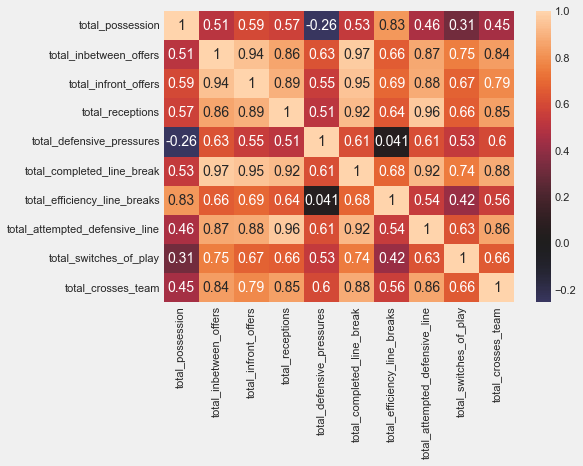

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

Робимо висновок, що більшість показніків вищезазначеної моделі мають лінійну залежність і таку модель можна розглядати для подальшого дослідження та висновків.
Перший показник для аналізу - **володіння м'ячем у відсотках** протягом ігрового часу проведенних матчів.

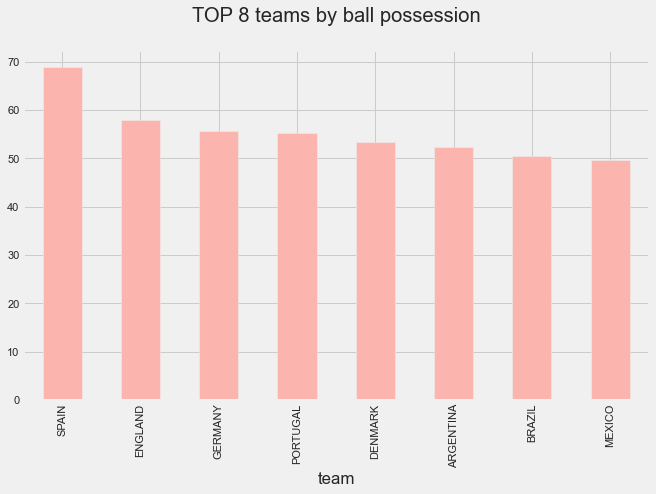

In [28]:
top_8_possession = final_table.sort_values('total_possession',ascending=False).head(8)
top_8_possession.total_possession.plot(kind = 'bar', title = 'TOP 8 teams by ball possession\n', colormap='Pastel1')
plt.show()

Із 4-х полуфіналістів в ТОП-8 попала тільки Аргентина. Це говорить про те, щоб досягнути результату не обов'язково володіти м'ячем всі 90 хвилин. Важливо дослідити, як працюють команди в інших фазах гри.

**Пропозиція прийому м'яча у фінальній третині поля** визначається як чітка та свідома дія, яка виконується при спробі отримати м’яч, що впливає на поточну фазу володіння м’ячем.

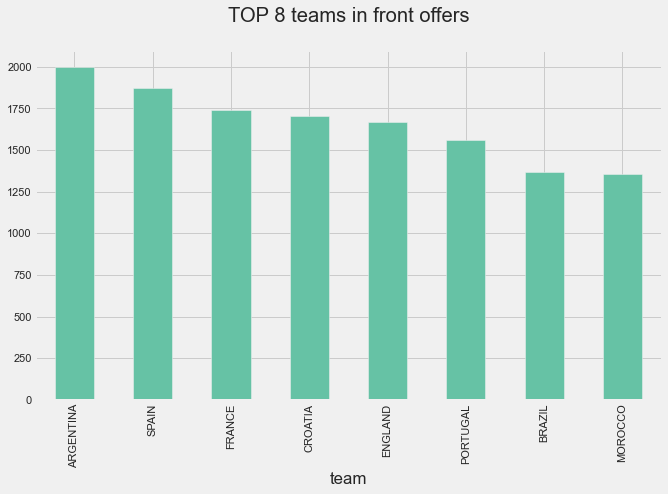

In [29]:
top_8_infront = final_table.sort_values('total_infront_offers',ascending=False).head(8)
top_8_infront.total_infront_offers.plot(kind = 'bar', title = 'TOP 8 teams in front offers\n', colormap='Set2')
plt.show()

Цей показник визначає, наскільки активно гравці відкриваються та пропонують себе "під передачу" у фінальній третині для проведення результативних дій. 

Проаналізуємо **аналогічний показник для пропозицій у середині поля**:

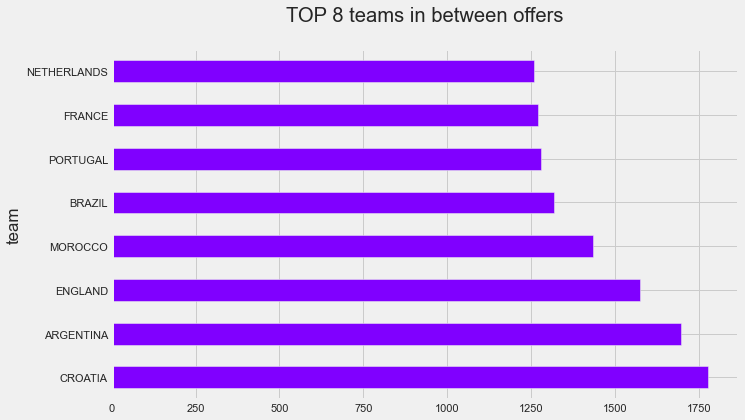

In [30]:
top_8_inbet = final_table.sort_values('total_inbetween_offers',ascending=False).head(8)
top_8_inbet.total_inbetween_offers.plot(kind = 'barh', title = 'TOP 8 teams in between offers\n', colormap='rainbow')
plt.show()

Гравці трьох команд-півфіналістів активно пропонують себе в центрі поля. Насамперед, це пояснюється якістю півзахисників у них командах та якісною побудовою атакуючих дій. Марокко випереджає по цьому показнику таких грандів, як Бразилія, Португалія, Франція та Іспанія.

А тепер слід перейти до **кількості успішних прийомів за лініями півзахисту та оборони суперника**, які визначають ефективність просування м'яча.

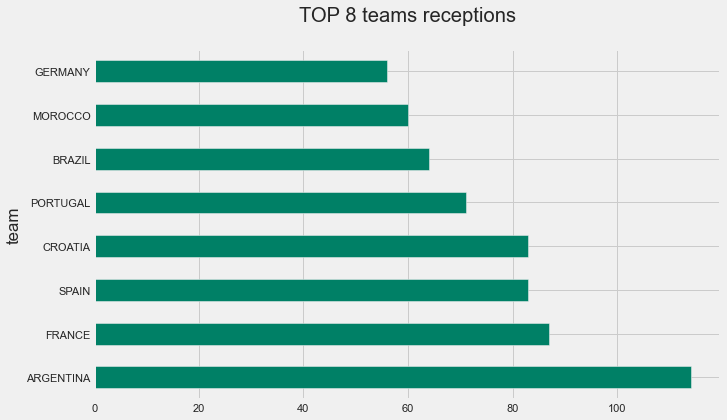

In [31]:
top_8_recep = final_table.sort_values('total_receptions',ascending=False).head(8)
top_8_recep.total_receptions.plot(kind = 'barh', title = 'TOP 8 teams receptions\n', colormap='summer')
plt.show()

Переможець турніру (Аргентина) впевнено лідирує по цьому показнику. Відмічаємо тенденцію, що ефективність просування м'яча - більш релевантний показник для аналізу успішності команд, чим показник "володіння м'ячем". Володіти м'ячем можно нескінченно довго, а ось вміння володіння м'ячем конвертувати в ефективне просування м'яча і стоврення моментів і є ключовим для команд високого рівня.

Не треба забувати про такий важливий показник, як **захисний тиск** - кількість дій гравця, який не володіє м’ячем, щоб закрити гравця, який володіє м’ячем, або можливий варіант прийому м’яча.

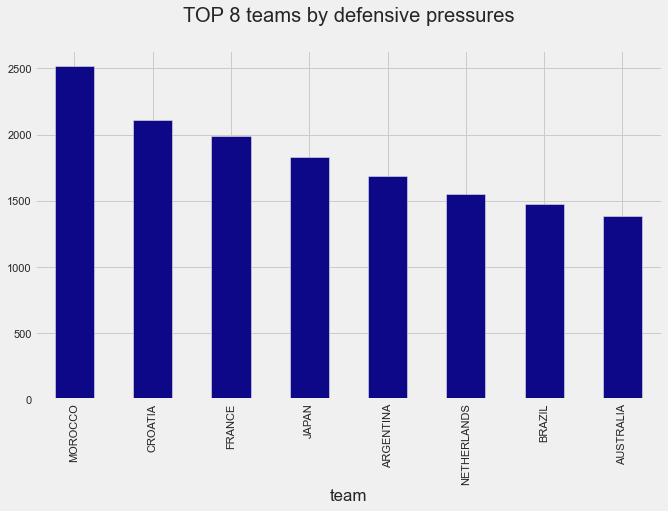

In [32]:
top_8_defensive_pressures = final_table.sort_values('total_defensive_pressures',ascending=False).head(8)
top_8_defensive_pressures.total_defensive_pressures.plot(kind = 'bar', title = 'TOP 8 teams by defensive pressures\n', colormap='plasma')
plt.show()

По цьому показнику можна відстежувати стилістику футболу команд. Найбільший захисний тиск здійснює Марокко. В тому числі завдяки цим зусиллям вони не давали розвивати успіх суперників і дійшли до полуфіналу ЧМ, будучи явно аутсайдерами турніру.

Дослідимо **ефективнісь подолання ліній оборони суперника в грі**:

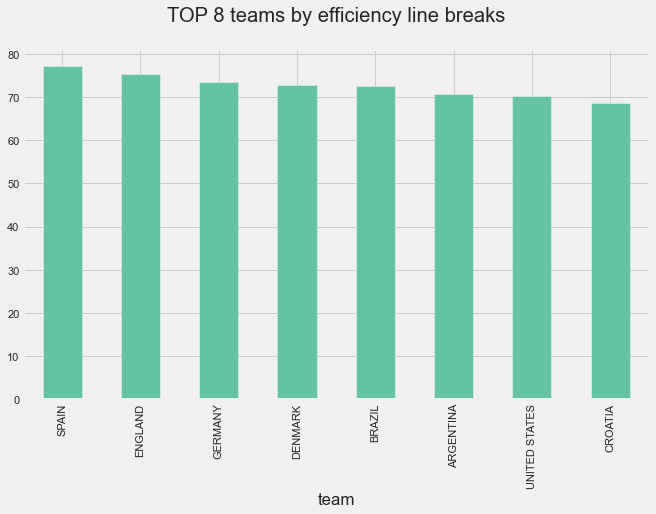

In [33]:
top_8_total_efficiency = final_table.sort_values('total_efficiency_line_breaks',ascending=False).head(8)
top_8_total_efficiency.total_efficiency_line_breaks.plot(kind = 'bar', title = 'TOP 8 teams by efficiency line breaks\n', colormap='Set2')
plt.show()

Найвищу ефективність розривів захисних ліній мають команди, які не потрапили до полуфіналу турніру. Це може говорити про те, що в даних команд є чітка структура гри, включаючи відповідних виконавців, але прослідковується недостатній баланс між атакою та обороною. 

Особливо яскраво видно це на прикладі Іспанії - гравці часто відкриваються, ефективно долають лінії оборони суперника, але одночасно з тим у них проблеми з реалізацією та захисним тиском на суперників.

**Переводи м'яча** - показник, який визначає кількість успішних змін вектору атак команди. Наприклад, перевод атаки з лівого на правий фланг за допомогою довгої чи середньої передачі.

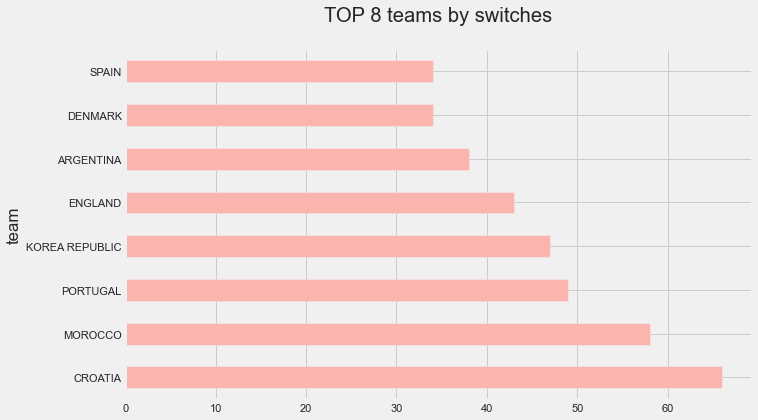

In [34]:
top_8_switches = final_table.sort_values('total_switches_of_play',ascending=False).head(8)
top_8_switches.total_switches_of_play.plot(kind = 'barh', title = 'TOP 8 teams by switches\n', colormap='Pastel1')
plt.show()

Більше за всіх даним методом побудови гри користувались Хорватія та Марокко, які дійшли до полуфіналу! Зверніть увагу на Іспанію, гравці якої цурались використовувати переводи м'яча та витрачали більше часу на побудову своїх атак за допомогою коротких передач.

В фінальній частині нашого дослідженная, **проаналізуємо кількість кроссів** - кількість довгих та середніх передач в штрафний майданчик суперника.

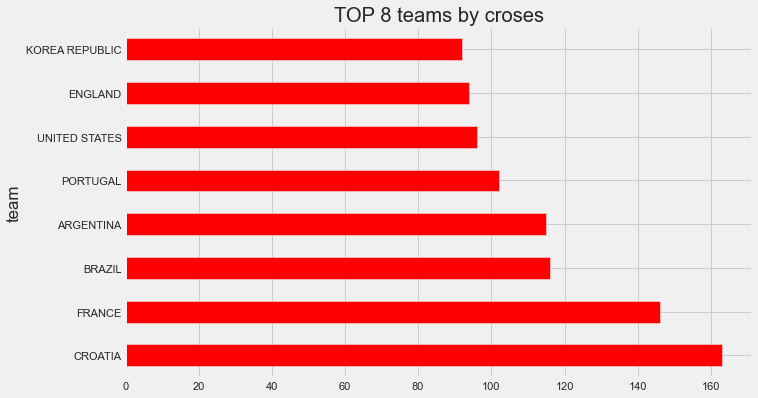

In [35]:
top_8_crosses = final_table.sort_values('total_crosses_team',ascending=False).head(8)
top_8_crosses.total_crosses_team.plot(kind = 'barh', title = 'TOP 8 teams by croses', colormap='autumn')
plt.show()

Найбільше кросів виконали Хорватія та Франція. Це пояснюється наявність високих виконавців в командах. Наприклад, Олів'є Жиру в Франції та Бруно Петкович в Хорватії та ін.

## 4. Висновки.

Основні ігрові **тенденції**, які можна виділити протягом цього турніру:

* Володіння м'ячем - не самий важливий показник для аналізу гри, важливо розуміти контекст ситуації, коли гравець володіє м'ячем (як він загострює, які рішення приймає під час тиску суперника, у якій фазі атаки гравець володіє м'ячем);

* В створенні ефективних атак ключову роль відіграє здатність гравців пропонувати себе в центрі поля та у фінальній третині поля. Саме це показує здатність гравців грати під тиском та їхню проактивність;

* Результат на цьому турнірі здобували команди, які активно просували м'яч між лініями суперника;

* Команди півфіналісти в лідерах по захисному тиску - це підтвердження прагматизму у футболі та бажання робити акцент не тільки на постійному володінні м'ячем, а також на активному контрпресингу суперника після втрати м'яча.

* Переводи м'яча та кроси - це не пережиток минулого в футболі, а при правильному використанні - це інструмент забезпечення результату в грі.